# Network Connectivity

Import and analyze an internal <b>email communication network between employees</b> of a mid-sized manufacturing company. 

- Each node represents an employee 
- Each directed edge between two nodes represents an individual email. 

The left node represents the sender and the right node represents the recipient.

File : `email_network.txt`


In [1]:
import networkx as nx
%matplotlib notebook
import matplotlib.pyplot as plt

Using networkx, load up the <b>directed multigraph</b> from `email_network.txt`

In [2]:
G = nx.read_edgelist('email_network.txt', delimiter='\t', data=[('time', int)], create_using=nx.MultiDiGraph())

How many employees and emails are represented in the graph ?

In [3]:
len(G.nodes()), len(G.edges())

(167, 82927)

Assume that information in this company can only be exchanged through email.

When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?

In [4]:
nx.is_strongly_connected(G)

False

Now assume that a communication channel established by an email allows information to be exchanged both ways.
Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


In [5]:
nx.is_connected(G.to_undirected())

True

How many nodes are in the largest (in terms of nodes) weakly connected component?

In [6]:
weak = nx.weakly_connected_components(G)
len(max(weak, key=len))

167

How many nodes are in the largest (in terms of nodes) strongly connected component?

In [7]:
strong = nx.strongly_connected_components(G)
    
len(max(strong, key=len))

126

### G_sc : subgraph of nodes in a largest strongly connected component

<b>Strongly connected component :</b> A directed graph is called strongly connected if there is a path in each direction between each pair of vertices of the graph.



In [8]:
strong_subs = nx.strongly_connected_component_subgraphs(G)
    
G_sc = max(strong_subs, key=len)

What is the average distance between nodes in `G_sc`?

In [9]:
nx.average_shortest_path_length(G_sc)

1.6461587301587302

What is the largest possible distance between two employees in `G_sc`?

In [10]:
nx.diameter(G_sc)

3

What is the set of nodes in `G_sc` with <b>eccentricity</b> equal to the <b>diameter</b>?

- <b>Eccentricity :</b> for one node, max distance to other nodes
- <b>Diameter :</b> max eccentricity

In [11]:
set(nx.periphery(G_sc))

{'129', '134', '97'}

What is the set of node(s) in `G_sc` with <b>eccentricity</b> equal to the <b>radius</b>?

- radius : min eccentricity

In [12]:
set(nx.center(G_sc))

{'38'}

Which node in `G_sc` is connected to the most other nodes by a shortest path of length equal to the diameter of `G_sc`?

How many nodes are connected to this node?

In [13]:
d = nx.diameter(G_sc)
p = nx.periphery(G_sc)
max_count = -1

result_node = None

for node in p:
    count = 0
    sp = nx.shortest_path_length(G_sc, node)
    
    for key, value in sp.items():
        if value == d:
            count += 1
    
    if count > max_count:
        result_node = node
        max_count = count

result_node, max_count

('97', 63)

<b>Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of `G_sc`.</b> 

What is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

In [14]:
center = nx.center(G_sc)[0]

int(nx.node_connectivity(G_sc, center, result_node)-1)

5

Construct an undirected graph `G_un` using `G_sc`.

In [15]:
undir_subgraph = G_sc.to_undirected()
G_un = nx.Graph(undir_subgraph)

What is the <b>transitivity</b> and <b>average clustering coefficient</b> of graph `G_un` ?

- <b>Transitivity :</b> transitivity is the overall probability for the network to have adjacent nodes interconnected, thus revealing the existence of tightly connected communities.
- <b>Average Clustering Coefficient :</b> clustering coefficient of a node in a graph quantifies how close its neighbours are to being a complete graph.

In [16]:
nx.transitivity(G_un), nx.average_clustering(G_un)

(0.570111160700385, 0.697527243723142)

## Conclusion

We have <b>82927 emails</b> between <b>167 employees</b>. <br>

This network is *weakly connected* : there is a path between each pair of employees, but is path can be unidirectionnal, so some employee can't reach every employee<br>

But we found a subset of 126 *strongly connected employees*, with <b>average distance = 1.64</b> and <b>largest distance = 3</b>. 

If we want to prevent communication from flowing to a peripheral node from any node in the center, we have to remove 5 nodes. So this network is <b>robust</b>, it can maintain properties even under attacks.

<IPython.core.display.Javascript object>


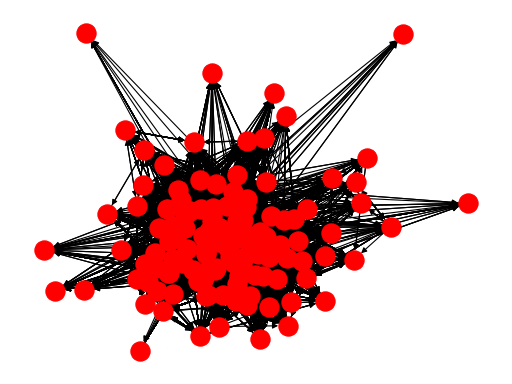

In [17]:
nx.draw(G_sc)